In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
import tensorflow as tf

# Check if GPU is available using the recommended function
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPU is available.")
    # Your GPU-accelerated code here
else:
    print("GPU is not available. Check your TensorFlow installation.")

GPU is available.


In [3]:
mp_holistic = mp.solutions.holistic # holistic model
mp_drawing = mp.solutions.drawing_utils # drawing utilities

In [4]:
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # color conversion
    image.flags.writeable = False                 # image is no longer writable
    results = model.process(image)                # make prediction
    image.flags.writeable = True                  # image is now writeable
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR) # color conversion
    return image,results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(0)
# set mmediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence =0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret,frame = cap.read()

        # make detection
        image,results = mediapipe_detection(frame,holistic)
        print(results)

        # draw landmarks
        draw_styled_landmarks(image,results)
        
        # Show to screen
        cv2.imshow('OpenCV Feed',image)
    
        # Breaking Gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [77]:
len(results.right_hand_landmarks.landmark)

21

In [78]:
draw_styled_landmarks(frame,results)

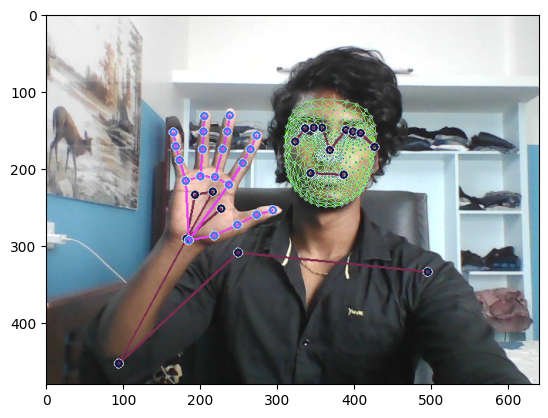

In [79]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

###  Extract key Points Values

In [80]:
len(results.face_landmarks.landmark)

468

In [59]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)

In [61]:
len(pose)

33

In [66]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [67]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [70]:
face

array([ 0.54330248,  0.61246836, -0.02291696, ...,  0.6059913 ,
        0.49665883,  0.00622011])

In [7]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,face,lh,rh])

In [82]:
extract_keypoints(results)[:4]

array([ 0.57590801,  0.3669835 , -0.74309194,  0.99997532])

### setup folders for collection

In [8]:
#path for exported data ,numpy arrays

DATA_PATH = os.path.join('MP_data')

#actions that we try to detect
actions = np.array(['helllo','thanks','iloveyou'])
#thirty videos worth of data
no_sequence = 30
# videos are going to be in 3`0 frames in length
sequence_length = 30

In [9]:
DATA_PATH

'MP_data'

In [10]:
import os
import numpy as np

In [174]:
import os
import numpy as np

# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_data')

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])
# Thirty videos worth of data
no_sequence = 30
# Videos are going to be in 30 frames in length
sequence_length = 30

for action in actions:
    for sequences in range(no_sequence):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequences)))
        except:
            print('not working')

### Collect Keypoint Values for Training and Testing

In [175]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequence):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

### preprocess data and create labels and feaatures

In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [12]:
label_map = {label:num for num, label in enumerate(actions)}

In [13]:
label_map

{'helllo': 0, 'thanks': 1, 'iloveyou': 2}

In [179]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [180]:
np.array(sequences).shape

(90, 30, 1662)

In [181]:
np.array(labels).shape

(90,)

In [182]:
x = np.array(sequences)

In [183]:
x.shape

(90, 30, 1662)

In [184]:
y = to_categorical(labels).astype(int)

In [185]:
y[:9]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [186]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05)

### Build and Train LSTM Neural Network

In [187]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf

In [188]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, activation='tanh', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='tanh'))
model.add(LSTM(200, return_sequences=False, activation='tanh'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [189]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='acc',patience=2)

In [190]:
model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=2000)

Epoch 1/2000
3/3 [==============================] - 5s 616ms/step - loss: 1.0889 - categorical_accuracy: 0.4941 - val_loss: 0.8978 - val_categorical_accuracy: 0.4000
Epoch 2/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.1510 - categorical_accuracy: 0.3176 - val_loss: 1.0787 - val_categorical_accuracy: 0.6000
Epoch 3/2000
3/3 [==============================] - 0s 40ms/step - loss: 1.0993 - categorical_accuracy: 0.3059 - val_loss: 1.1009 - val_categorical_accuracy: 0.4000
Epoch 4/2000
3/3 [==============================] - 0s 37ms/step - loss: 1.0741 - categorical_accuracy: 0.5059 - val_loss: 1.0775 - val_categorical_accuracy: 0.4000
Epoch 5/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.9943 - categorical_accuracy: 0.5294 - val_loss: 1.0348 - val_categorical_accuracy: 0.4000
Epoch 6/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.8768 - categorical_accuracy: 0.6471 - val_loss: 0.9663 - val_categorical_accuracy: 0.4000
Epoch 7/2

KeyboardInterrupt: 

In [191]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 30, 100)           705200    
                                                                 
 lstm_16 (LSTM)              (None, 30, 128)           117248    
                                                                 
 lstm_17 (LSTM)              (None, 200)               263200    
                                                                 
 dense_15 (Dense)            (None, 100)               20100     
                                                                 
 dense_16 (Dense)            (None, 100)               10100     
                                                                 
 dense_17 (Dense)            (None, 3)                 303       
                                                                 
Total params: 1,116,151
Trainable params: 1,116,151
No

In [192]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 41ms/step - loss: 5.2355e-04 - categorical_accuracy: 1.0000


[0.0005235468852333724, 1.0]

In [193]:
predicted = model.predict(x_test)

1/1 [==============================] - 1s 960ms/step


In [194]:
actions[np.argmax(predicted[0])]

'hello'

In [195]:
actions[np.argmax(y_test[0])]

'hello'

### save our model

In [196]:
model.save('actionv1.h5')

In [4]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score,confusion_matrix

In [14]:
model = tf.keras.models.load_model('actionv1.h5')

In [198]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(predicted, axis=1).tolist()

In [199]:
accuracy_score(ytrue, yhat)

1.0

In [200]:
cm = confusion_matrix(ytrue,yhat)

In [201]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [0, 2]],

       [[2, 0],
        [0, 3]]], dtype=int64)

In [15]:
from scipy import stats

In [16]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [17]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [38]:
cap.release()
cv2.destroyAllWindows()